# 8-Puzzle - Analysis of results

We're generating unique random puzzles, for which we're assigning 31 different weights per example ranging from 0.7 to 1.0 for the Manhattan distance heuristic and 0.0 to 0.3 for the Hamming distance heuristic.

The calculation time is mainly influenced by the depth of the solution path, as well as the mix of the weights of the heuristics. Typically the larger the Hamming distance becomes, the longer the calculation takes, therefore Hamming was capped at 0.3.

For the showcase we're taking 1000 unique puzzles, each having 31 weights, which results in 31.000 unique constellations.

All data set has the following columns:
'array', 'weights', 'visited_nodes', 'expanded_nodes','branching_factor', 'time_elapsed_astar', 'depth'


In [1]:
import jsonpickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

with open("results_1000_2021-05-08.json", "r") as file:
    contents = file.read()
    unfrozen = jsonpickle.decode(contents)

df = pd.DataFrame(unfrozen)

In [18]:
df.sort_values('time_elapsed_astar', ascending=False)

,array,weights,visited_nodes,expanded_nodes,branching_factor,time_elapsed_astar,depth
2258,"(0, 4, 6, 5, 2, 7, 8, 3, 1)","(0.74, 0.26)",46633,27875,1.672897,267.378082,30
2256,"(0, 4, 6, 5, 2, 7, 8, 3, 1)","(0.76, 0.24)",44734,26742,1.672762,265.512055,30
2257,"(0, 4, 6, 5, 2, 7, 8, 3, 1)","(0.75, 0.25)",44736,26753,1.672149,264.015894,30
2255,"(0, 4, 6, 5, 2, 7, 8, 3, 1)","(0.77, 0.23)",44504,26618,1.671914,258.450198,30
2254,"(0, 4, 6, 5, 2, 7, 8, 3, 1)","(0.78, 0.22)",43113,25790,1.671656,249.923261,30
...,...,...,...,...,...,...,...
17148,"(3, 5, 1, 4, 7, 0, 6, 8, 2)","(0.95, 0.05)",37,19,1.894737,0.000000,9
17145,"(3, 5, 1, 4, 7, 0, 6, 8, 2)","(0.98, 0.02)",37,19,1.894737,0.000000,9
17143,"(3, 5, 1, 4, 7, 0, 6, 8, 2)","(1.0, 0.0)",39,21,1.809524,0.000000,9
9269,"(0, 2, 5, 1, 3, 4, 6, 7, 8)","(1.0, 0.0)",18,9,1.888889,0.000000,6


# Nomenclature

(This may be interpreted in a few different ways, so I'll state it here)

- Visited Nodes. All nodes in the tree (visited in the sense as actually generated in the code)
- Expanded Nodes: All nodes which have children (non-leaf nodes)

## Puzzle-distribution by depth
Group results by depth (= how many steps were required to finish the puzzle), show the distribution of depths as chart

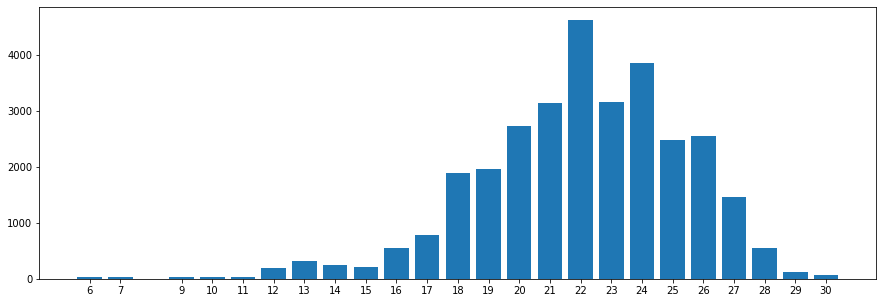

In [3]:
group = df.groupby(['depth'])
x_pos = [i for i, _ in enumerate(group)]
fig, ax = plt.subplots(figsize=(15, 5))
plt.xticks(list(group.groups.keys()))
ax.bar(list(group.groups.keys()), list(group.size()))
plt.show()

# In all our previous tests it has shown that when using a random generation of puzzles,
# a seemingly gaussian distribution of puzzle-depths occurs


## Print constellation for all (average)

Shows the average expanded nodes based on the weight

### Average expanded & visited nodes

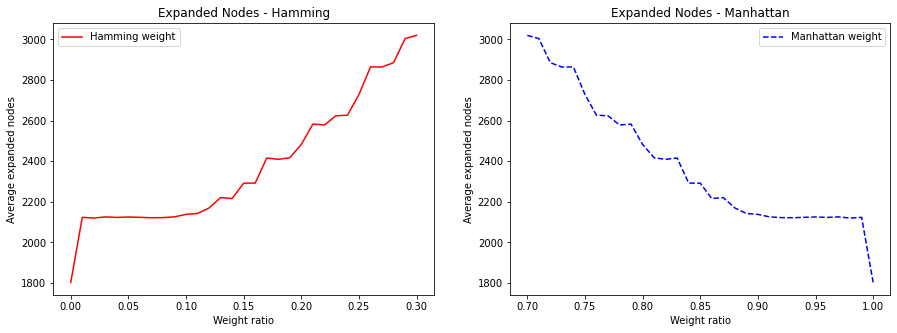

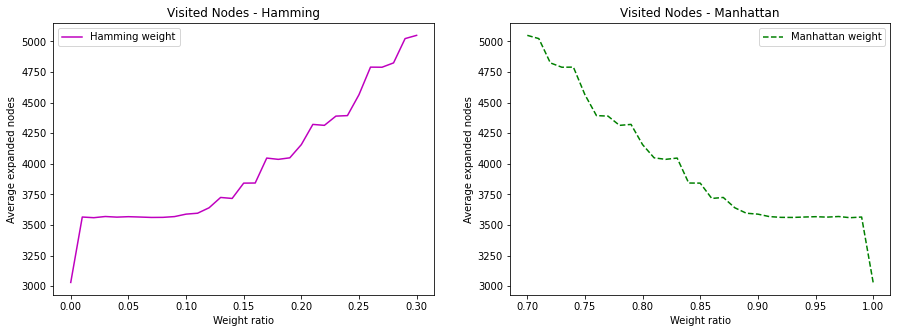

In [4]:
weight_group = df.groupby(['weights'])

# Expanded nodes
x1 = np.array(list(weight_group.groups.keys()))[:, 0]
x2 = np.array(list(weight_group.groups.keys()))[:, 1]
y1 = weight_group['expanded_nodes'].mean()

# Visited nodes
y2 = weight_group['visited_nodes'].mean()

# Expanded nodes Manhattan
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[1].set_title("Expanded Nodes - Manhattan")
ax[1].plot(x1, y1, "b--", label="Manhattan weight")
ax[1].set_xlabel("Weight ratio")
ax[1].set_ylabel("Average expanded nodes")
ax[1].legend()

# Expanded nodes Hamming
ax[0].set_title("Expanded Nodes - Hamming")
ax[0].plot(x2, y1, "r", label="Hamming weight")
ax[0].set_xlabel("Weight ratio")
ax[0].set_ylabel("Average expanded nodes")
ax[0].legend()
plt.show()

# Visited nodes Manhattan
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[1].set_title("Visited Nodes - Manhattan")
ax[1].plot(x1, y2, "g--", label="Manhattan weight")
ax[1].set_xlabel("Weight ratio")
ax[1].set_ylabel("Average expanded nodes")
ax[1].legend()

# Visited nodes Hamming
ax[0].set_title("Visited Nodes - Hamming")
ax[0].plot(x2, y2, "m", label="Hamming weight")
ax[0].set_xlabel("Weight ratio")
ax[0].set_ylabel("Average expanded nodes")
ax[0].legend()
plt.show()

# We can see that expanded and visited nodes follow a very similar curve.

### Average Branching factor

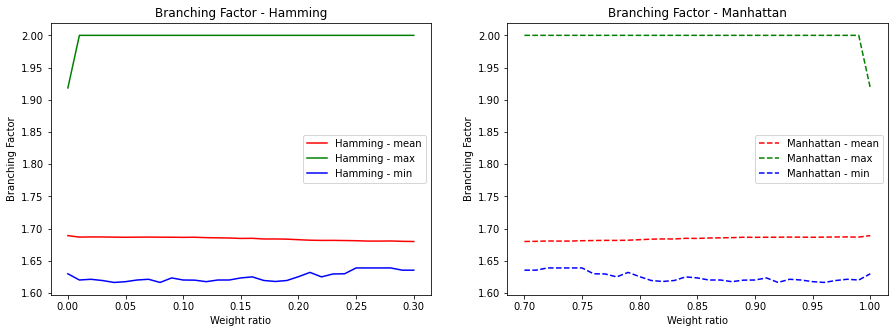

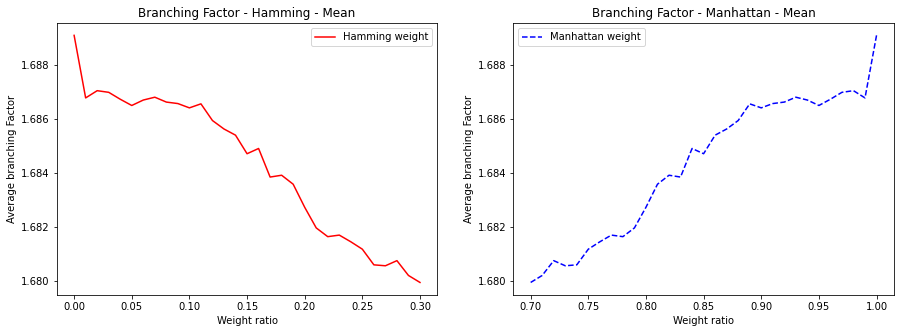

In [5]:
weight_group = df.groupby(['weights'])

# Branching factor
x1 = np.array(list(weight_group.groups.keys()))[:, 0]
x2 = np.array(list(weight_group.groups.keys()))[:, 1]
y1 = weight_group['branching_factor'].mean()
y2 = weight_group['branching_factor'].max()
y3 = weight_group['branching_factor'].min()


# Branching Factor Manhattan
fig, ax = plt.subplots(1,2, figsize=(15, 5))
ax[1].set_title("Branching Factor - Manhattan")
ax[1].plot(x1, y1, "r--", label="Manhattan - mean")
ax[1].plot(x1, y2, "g--", label="Manhattan - max")
ax[1].plot(x1, y3, "b--", label="Manhattan - min")
ax[1].set_xlabel("Weight ratio")
ax[1].set_ylabel("Branching Factor")
ax[1].legend()

# Branching factor Hamming
ax[0].set_title("Branching Factor - Hamming")
ax[0].plot(x2, y1, "r", label="Hamming - mean")
ax[0].plot(x2, y2, "g", label="Hamming - max")
ax[0].plot(x2, y3, "b", label="Hamming - min")
ax[0].set_xlabel("Weight ratio")
ax[0].set_ylabel("Branching Factor")
ax[0].legend()
plt.show()

############### MEAN IN DETAIL ###################

# Branching Factor Manhattan
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[1].set_title("Branching Factor - Manhattan - Mean")
ax[1].plot(x1, y1, "b--", label="Manhattan weight")
ax[1].set_xlabel("Weight ratio")
ax[1].set_ylabel("Average branching Factor")
ax[1].legend()

# Expanded nodes Hamming
ax[0].set_title("Branching Factor - Hamming - Mean")
ax[0].plot(x2, y1, "r", label="Hamming weight")
ax[0].set_xlabel("Weight ratio")
ax[0].set_ylabel("Average branching Factor")
ax[0].legend()
plt.show()


# Unexpected finding: The branching factor rises (very slightly) with rising Manhattan ratio


## Min Nodes

In [6]:
min_value = group[['expanded_nodes']].min()
min_value.transpose()

depth,6,7,9,10,11,12,13,14,15,16,...,21,22,23,24,25,26,27,28,29,30
expanded_nodes,6,8,19,15,21,19,26,38,37,38,...,248,197,347,341,778,738,2013,2965,7707,10090


## Max Nodes

In [7]:
max_value = group[['expanded_nodes']].max()
max_value.transpose()

depth,6,7,9,10,11,12,13,14,15,16,...,21,22,23,24,25,26,27,28,29,30
expanded_nodes,9,10,21,17,25,77,117,106,175,283,...,2104,3188,4164,5813,9323,12611,16420,18129,22712,28357


## Best weights based on the least nodes per depth

### Expanded

In [8]:
min_nodes = df.loc[group['expanded_nodes'].idxmin()]
np.mean(min_nodes['weights'].tolist(), axis=0)

array([0.97041667, 0.02958333])

### Visited

In [9]:
min_nodes = df.loc[group['visited_nodes'].idxmin()]
np.mean(min_nodes['weights'].tolist(), axis=0)

array([0.97041667, 0.02958333])

## Best weights based on the weights with the least nodes of each example

In [10]:
group_by_example = df.groupby('array')

### Expanded

In [11]:
min_expanded_nodes_per_example = df.loc[group_by_example['expanded_nodes'].idxmin()]
np.mean(min_expanded_nodes_per_example['weights'].tolist(), axis=0)

array([0.97907, 0.02093])

### Visited

In [12]:
min_visited_nodes_per_example = df.loc[group_by_example['visited_nodes'].idxmin()]
np.mean(min_visited_nodes_per_example['weights'].tolist(), axis=0)

array([0.97758, 0.02242])

## Number of examples where Manhattan only ([1.0, 0.0]) is the best choice 

### Expanded / Visited

In [13]:
manhattan_only_expanded = (min_expanded_nodes_per_example.loc[min_expanded_nodes_per_example['weights'] == (1.0, 0.0)]).shape[0]
print(f"Manhattan only is the best choice in {manhattan_only_expanded}/{min_expanded_nodes_per_example.shape[0]} examples for expanded nodes")

Manhattan only is the best choice in 792/1000 examples for expanded nodes


### Visited

In [14]:
manhattan_only_visited = (min_visited_nodes_per_example.loc[min_visited_nodes_per_example['weights'] == (1.0, 0.0)]).shape[0]
print(f"Manhattan only is the best choice in {manhattan_only_visited}/{min_visited_nodes_per_example.shape[0]} examples for visited nodes")

Manhattan only is the best choice in 787/1000 examples for visited nodes


## Best weights based on the branching factor per example

In [15]:
min_branching_factor_per_example = df.loc[group_by_example['branching_factor'].idxmin()]
np.mean(min_branching_factor_per_example['weights'].tolist(), axis=0)

array([0.82943, 0.17057])